In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import cv2 as cv
from skimage import io
from skimage.io import imread
from skimage.feature import canny
from scipy.signal import convolve2d
from skimage.measure import label
from skimage import morphology
from sklearn.cluster import AgglomerativeClustering
import tensorflow
import scipy.stats as st


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Diagnostics: type of image_test is <class 'numpy.ndarray'>


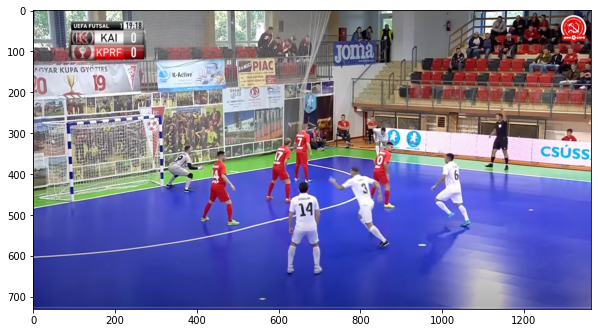

In [28]:
image_test = cv.imread("/content/drive/MyDrive/CV course/Screenshot_2.jpg")
img = cv.cvtColor(image_test, cv.COLOR_BGR2RGB)
print("Diagnostics: type of image_test is", type(image_test) )

plt.figure(figsize=(10,10))
plt.imshow(img)


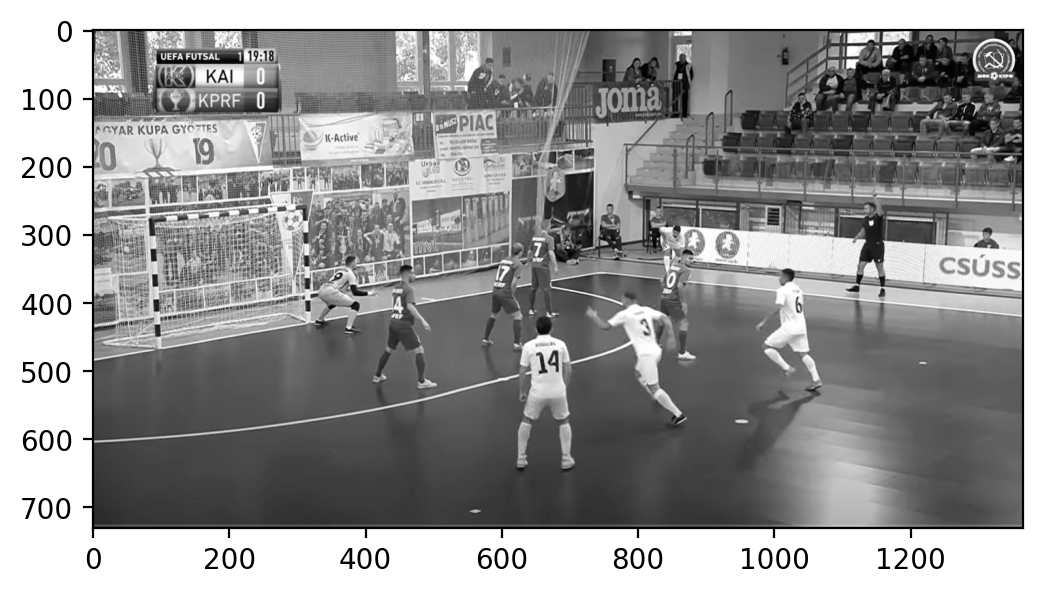

In [29]:
img_g = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.figure(dpi=200)
plt.imshow(img_g,cmap=plt.cm.gray)

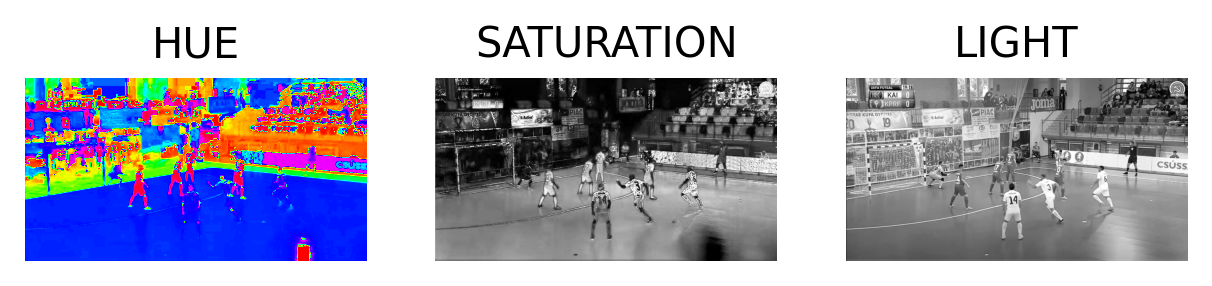

In [30]:
HLS = cv.cvtColor(img, cv.COLOR_RGB2HLS)

HUE = HLS[:, :, 0]              # Split attributes
LIGHT = HLS[:, :, 1]
SAT = HLS[:, :, 2]

plt.figure(dpi=250)
plt.subplot(1,3,1)              # Plot color attributes
plt.imshow(HUE, cmap='hsv')
plt.title('HUE')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(SAT, cmap='gray')
plt.title('SATURATION')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(LIGHT, cmap='gray')
plt.title('LIGHT')
plt.axis('off')
plt.show()

In [31]:

def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

In [32]:
R = img[:, :, 0]              # Split attributes
G = img[:, :, 1]
B = img[:, :, 2]

HLS = cv.cvtColor(img, cv.COLOR_RGB2HLS)
HUE = HLS[:, :, 0]              # Split attributes
LIGHT = HLS[:, :, 1]
SAT = HLS[:, :, 2]

imgYCrCb = rgb2ycbcr(img)
Y = imgYCrCb[:, :, 0]              # Split attributes
Cr = imgYCrCb[:, :, 1]
Cb = imgYCrCb[:, :, 2]

img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
L = img_lab[:, :, 0]              # Split attributes
A = img_lab[:, :, 1]
BB = img_lab[:, :, 2]

In [ ]:
#blue
mask_blue =  (Cr > 300) | (Cr < 145) |(HUE > 180) | (HUE < 110) 
img2_blue = img.copy()
# img2[mask] = 0

mask_blue_clean = morphology.remove_small_objects(mask_blue, min_size=200000, connectivity=4, in_place=False)
mask_blue_clean = morphology.remove_small_holes(mask_blue_clean, area_threshold=5000, connectivity=3, in_place=False)
plt.figure(dpi=300)
plt.subplot(1,2,1)   
# plt.axis('off')
plt.imshow(img2_blue, cmap="gray")
plt.subplot(1,2,2)     
# plt.axis('off')
plt.imshow(mask_blue_clean, cmap="gray")
mask = np.array(mask_blue_clean, dtype=np.uint8)
print(type(mask), type(mask_blue_clean))

In [22]:
from skimage import measure

contours = measure.find_contours(mask_blue_clean, 0.8)

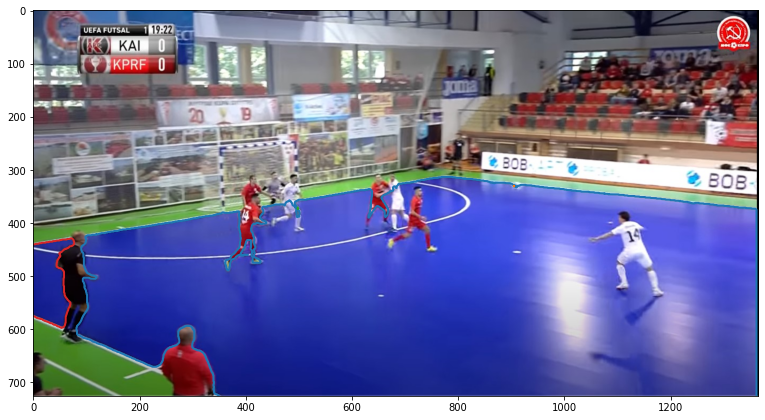

In [23]:
fig, ax = plt.subplots(figsize=(13, 13))
ax.imshow(img, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    contour = np.array(contour).squeeze() # we need to remove one dim, se below
    if contour.ndim > 1:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [27]:
len(contours)

4

(3456, 2)
(3456, 2)


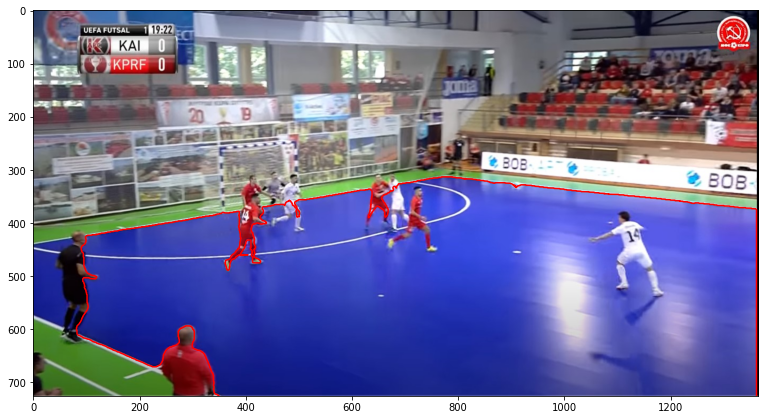

In [24]:
#contour = max(contours, key= lambda x : cv.contourArea(x))
contour = contours[0]
# we need to remove one unnecessary dimension
print(contour.shape)
contour = contour.squeeze()
print(contour.shape)
fig, ax = plt.subplots(figsize=(13, 13))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(contour[:, 1], contour[:,  0], 'r')

In [24]:
contour

array([[ 725. , 1361.8],
       [ 724. , 1361.8],
       [ 723. , 1361.8],
       ...,
       [ 724.8,  348. ],
       [ 724.8,  349. ],
       [ 725. ,  349.2]])

In [18]:
dcont = np.dstack(contour)

In [33]:
maxy = np.argmax(dcont[0][0])
maxx = np.argmax(dcont[0][1])
miny = np.argmin(dcont[0][0])
minx = np.argmin(dcont[0][1])
print("max y", maxy,"coor" ,contour[0], "max x", maxx, "min y", miny,"coor", contour[miny], "min x", minx,"coor",  contour[minx])

max y 0 coor [ 725.  1361.8] max x 0 min y 1016 coor [313.2 789. ] min x 2889 coor [597.   81.2]


In [37]:
dcont[0][0][1:].shape


(3455,)

In [40]:
k=0
maxy = np.argmax(dcont[0][0][k:])
print("start",contour[maxy][1])
while contour[maxy][1]>1100:
  k+=1
  maxy = np.argmax(dcont[0][0][k:])
  print("steps", contour[maxy][1])

start 1361.8
steps 349.0


In [74]:
k=0
maxx = np.argmax(dcont[0][1][k:])
print("start",contour[maxx])
while contour[maxx][1]<1355 or contour[maxx][1]>1361:
  k+=1
  maxx = np.argmax(dcont[0][1][k:])
  #print("steps", contour[maxx])

print("start",contour[maxx])
dcont[0][1][k:]

start [ 725.  1361.8]
start [ 373.2 1355. ]


array([218.2, 219. , 220. , 221. , 221.2, 222. , 223. , 223.2, 224. ,
       225. , 226. , 227. , 228. , 229. , 230. , 231. , 232. , 232.8,
       233. , 234. , 234.8, 235. , 236. , 236.8, 237. , 238. , 238.8,
       239. , 239.8, 239.8, 240. , 240.8, 241. , 241.8, 241.8, 242. ,
       242.8, 242.8, 243. , 243.8, 243.8, 243.8, 243.8, 243.8, 244. ,
       244.8, 244.8, 244.8, 244.8, 244.8, 244.8, 245. , 245.8, 245.8,
       246. , 246.8, 246.8, 247. , 247.8, 247.8, 248. , 248.8, 248.8,
       249. , 249.8, 250. , 250.8, 251. , 251.8, 252. , 252.8, 253. ,
       253.8, 254. , 255. , 255.8, 256. , 256.8, 257. , 258. , 259. ,
       260. , 260.8, 261. , 262. , 262.8, 263. , 264. , 265. , 265.8,
       266. , 267. , 268. , 268.8, 269. , 270. , 270.8, 271. , 271.8,
       272. , 272.8, 273. , 273.8, 274. , 274.8, 274.8, 274.8, 274.8,
       274.8, 274.8, 274.8, 274. , 273.8, 273.8, 273.8, 273.8, 273. ,
       272.8, 272.8, 272.8, 272.8, 272.8, 272.8, 272.8, 272.8, 272.8,
       272.8, 272.8,

In [81]:
print("max y", maxy,"coor" ,contour[maxy], "max x", maxx,"coor" ,contour[maxx], "min y", miny,"coor", contour[miny], "min x", minx,"coor",  contour[minx])
d = contour[maxy]
l = contour[minx]
r = contour[maxx]
u = contour[miny]
corners = np.array([l,u,r,d])
corners

max y 3454 coor [724.8 349. ] max x 358 coor [ 373.2 1355. ] min y 1016 coor [313.2 789. ] min x 2889 coor [597.   81.2]


array([[ 597. ,   81.2],
       [ 313.2,  789. ],
       [ 373.2, 1355. ],
       [ 724.8,  349. ]])

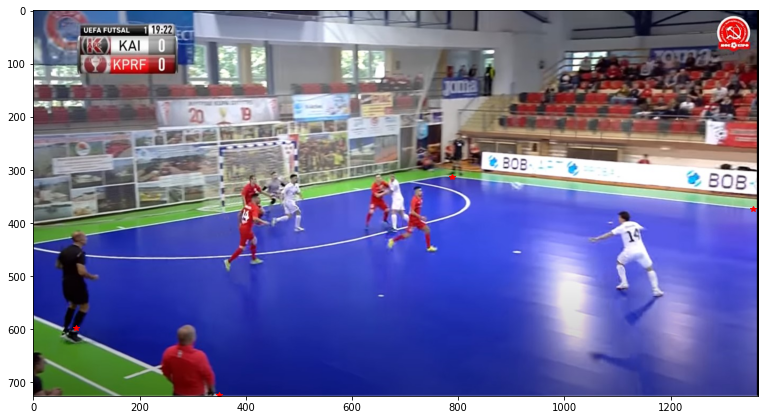

In [82]:
fig, ax = plt.subplots(figsize=(13, 13))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(corners[:, 1], corners[:, 0], '*r')

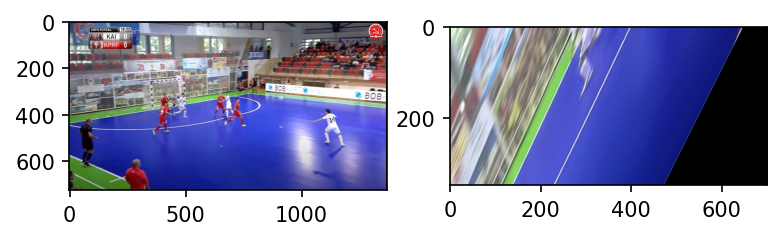

In [93]:
from skimage.transform import ProjectiveTransform, warp
points_current = np.array([l,u,r,d])
size = 700
#corners = np.array([l,u,l,d])
points_desired = np.array([[0, 0],[size, 0], [size, size],[0, size]])
tform = ProjectiveTransform()
tform.estimate(points_desired, points_current)
image_warped = warp(img, tform)[:int(size/2), :size]
#plt.figure(figsize=(13 ,13))


plt.figure(dpi=150)
plt.subplot(1,2,1)   
# plt.axis('off')
plt.imshow(img, cmap=plt.cm.gray)
plt.subplot(1,2,2)     
# plt.axis('off')
plt.imshow(image_warped, cmap=plt.cm.gray)

In [ ]:
#blue
mask_blue =  (Cr > 300) | (Cr < 145) |(HUE > 180) | (HUE < 110) 
img2_blue = img.copy()
# img2[mask] = 0

mask_blue_clean = morphology.remove_small_objects(mask_blue, min_size=200000, connectivity=7, in_place=False)
mask_blue_clean = morphology.remove_small_holes(mask_blue, area_threshold=2000, connectivity=3, in_place=False)
plt.figure(dpi=300)
plt.subplot(1,2,1)   
# plt.axis('off')
plt.imshow(img2_blue, cmap="gray")
plt.subplot(1,2,2)     
# plt.axis('off')
plt.imshow(mask_blue_clean, cmap="gray")
mask = np.array(mask_blue_clean, dtype=np.uint8)
print(type(mask), type(mask_blue_clean))

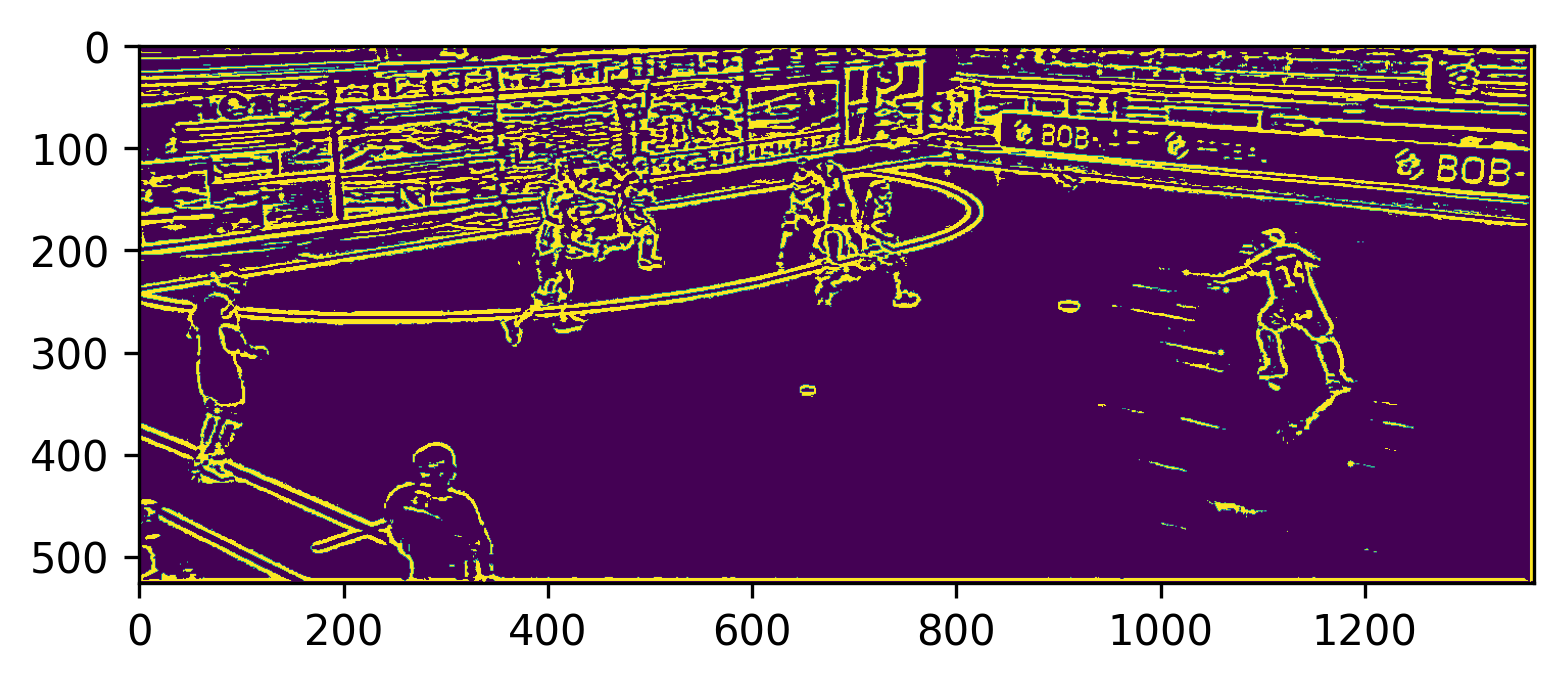

(<matplotlib.image.AxesImage at 0x7f8036f8ac50>, None)

In [36]:
corners = cv.goodFeaturesToTrack(thresh,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(thresh,(x,y),3,255,-1)
plt.figure(dpi=300)
plt.imshow(thresh),plt.show()

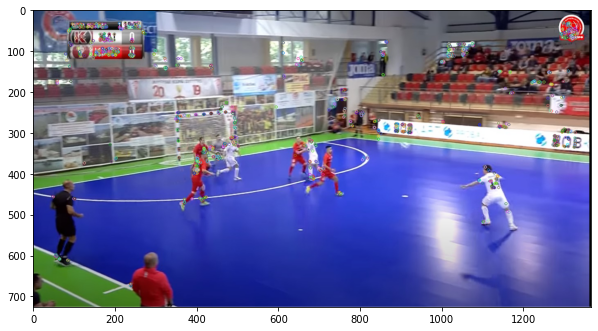

In [80]:
orb = cv.ORB_create(nfeatures=1500)
keypoints_orb, descriptors = orb.detectAndCompute(img, None)

plt.figure(figsize=(10,10))
img_k = cv.drawKeypoints(img, keypoints_orb, None)
plt.imshow(img_k)

In [70]:
 def convolve(image, kernel):
    assert image.ndim == kernel.ndim == 2
    
    kernel = np.flip(kernel, axis=range(kernel.ndim))
    shape = np.array(image.shape) - kernel.shape + 1
    result = np.empty(shape, dtype=float) # we'll keep things simple and always return float
    h, w = kernel.shape
        
    for i, j in np.ndindex(*shape):
        result[i, j] = (image[i:i + h, j:j + w] * kernel).sum()

    return result

    
def convolve_same(image, kernel):
    # pad image before convolution to obtain same resulting shape
    delta = np.array(kernel.shape) - 1
    # left and right padding
    left = delta // 2
    right = delta - left
    padding = np.array([left, right]).T

    image = np.pad(image, padding, mode='constant') 
    return convolve(image, kernel)

    import scipy.stats as st


def get_gk(size=15, nsig=3):
    """Returns a 2D Gaussian kernel"""
    x = np.linspace(-nsig, nsig, size + 1)
    kernel = np.diff(st.norm.cdf(x))
    kernel = np.outer(kernel, kernel)
    kernel /= kernel.sum()
    return kernel

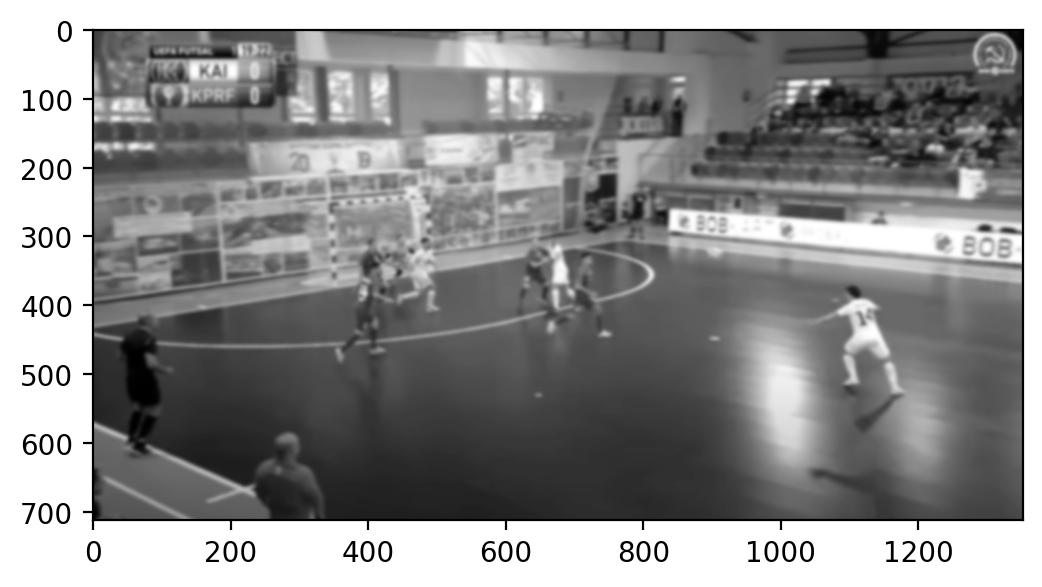

In [71]:
img_smoothed = convolve(np.float32(img_g), get_gk())

plt.figure(dpi=200)
plt.imshow(img_smoothed,cmap=plt.cm.gray)

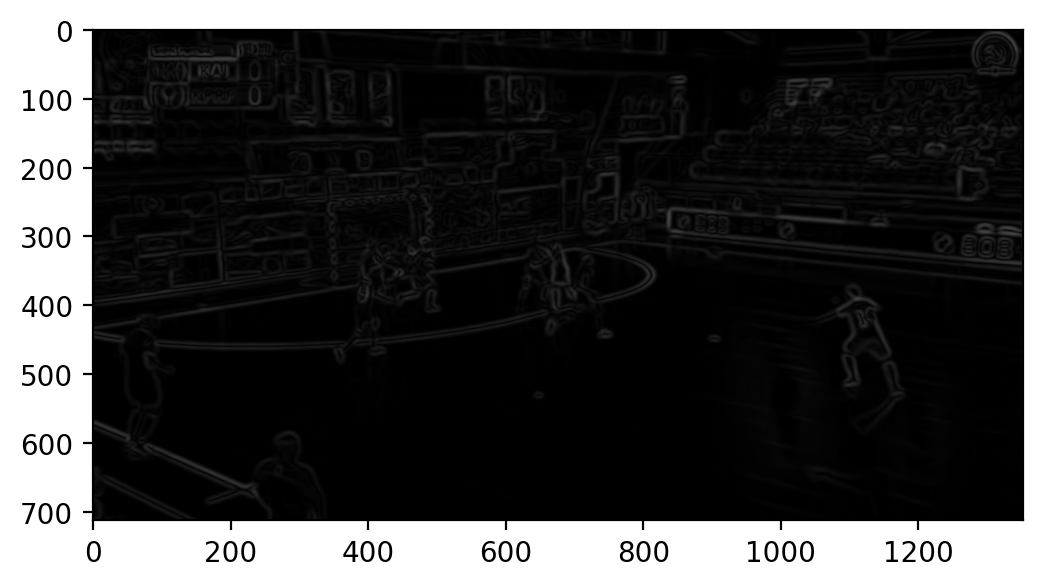

In [73]:
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float32')
kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype='float32')
grad_x = convolve_same(img_smoothed, kernel_x) 
grad_y = convolve_same(img_smoothed, kernel_y) 
norm = np.hypot(grad_y, grad_x)
plt.figure(dpi=200)
plt.imshow(norm,cmap=plt.cm.gray)

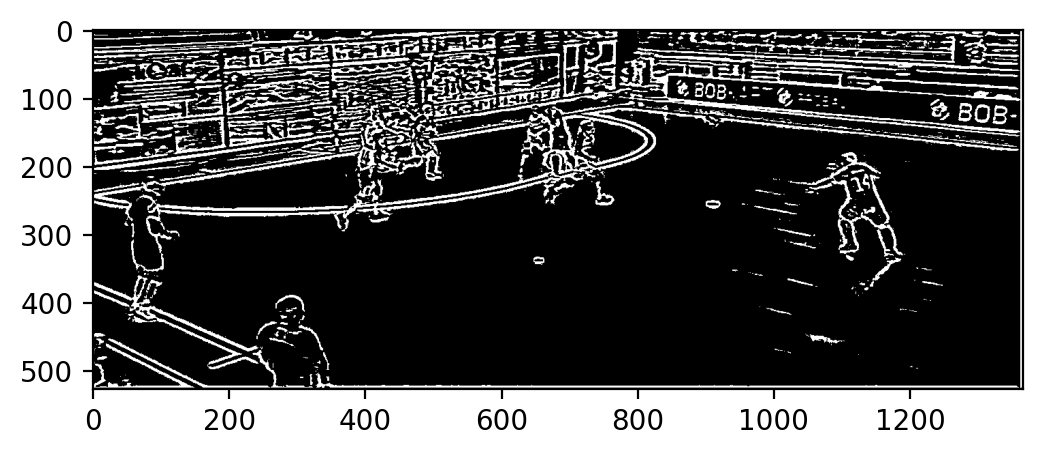

In [15]:
thresh = cv.adaptiveThreshold(img_g[200:,:], 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 5)
thresh = cv.bitwise_not(thresh)
plt.figure(dpi=200)
plt.imshow(thresh,cmap=plt.cm.gray)

In [16]:
import math

lines = cv.HoughLines(thresh, 1, np.pi / 50, 150, None, 0, 0)
    
if lines is not None:
     for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(img[200:,:], pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    

(868, 1, 2)

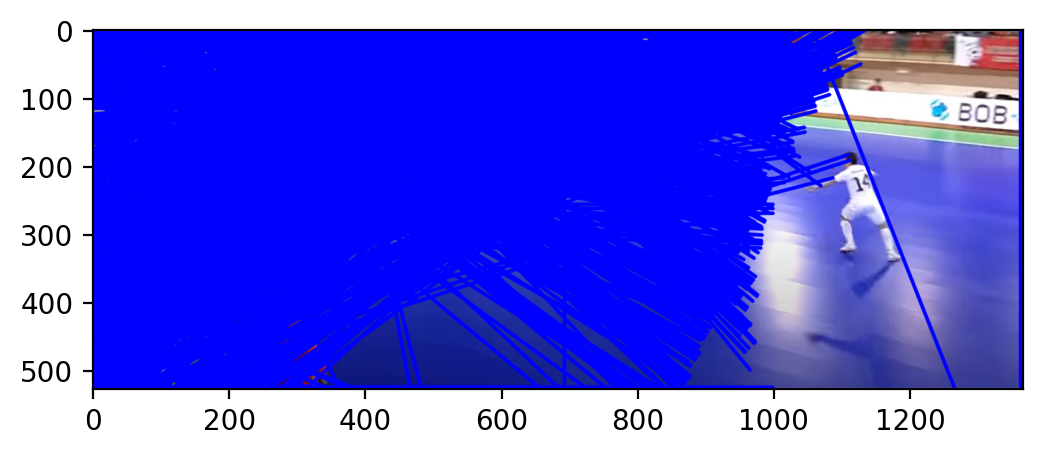

In [18]:

plt.figure(dpi=200)
plt.imshow(img[200:,:])

lines.shape

In [127]:
#import imutils
#edges = (edges).astype(np.uint8)
ext_contours = cv.findContours(mask_blue_clean.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]
#ext_contours = imutils.grab_contours(ext_contours)
fig, ax = plt.subplots(figsize=(13, 13))
ax.imshow(img, cmap=plt.cm.gray)

for n, contour in enumerate(ext_contours):
    contour = np.array(contour).squeeze() # we need to remove one dim, se below
    if contour.ndim > 1:
        ax.plot(contour[:, 0], contour[:, 1], linewidth=2)

TypeError: ignored

(1841, 1, 2)
(1841, 2)


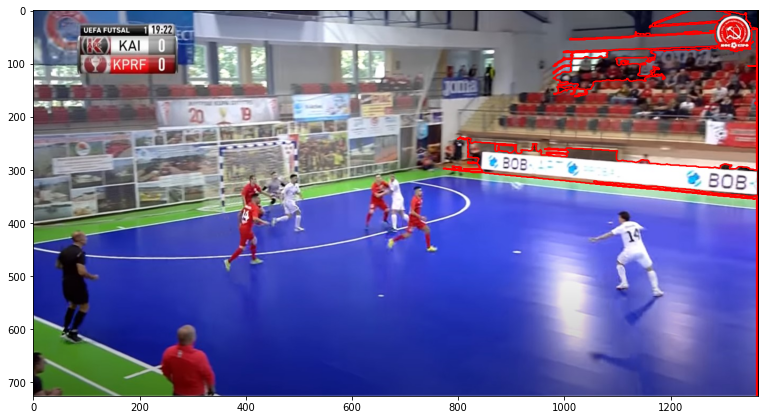

In [51]:
contour = max(ext_contours, key= lambda x : cv.contourArea(x))

# we need to remove one unnecessary dimension
print(contour.shape)
contour = contour.squeeze()
print(contour.shape)
fig, ax = plt.subplots(figsize=(13, 13))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(contour[:, 0], contour[:,  1], 'r')

TypeError: ignored

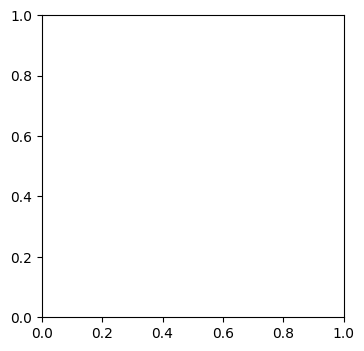

In [21]:
img = cv.imread('/content/drive/My Drive/СV course/Screenshot_1.jpg')
#img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.figure(dpi=100)
plt.imshow(img)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
